![example]()

# Predicting-Most-Valuable-Home-Projects-In-King-County-Analysis

# Introduction

The King County Housing Data Set contains information about the size, location, condition, and other features of houses in King County. A full description of the dataset's columns can be found below. The aim of this project is to develop a linear regression model than can predict a house's price as accurately as possible.

# Business Problem

A client in King County, WA wants to advise homeowners on home improvement projects that will add to the sale value of their homes.

# Analysis Questions

This analysis will seek to answer three questions about the data:

Question 1: Will enclosing a porch increase the sale price of a home?

Question 2: Is converting a garage to a bedroom a good way to increase the sale price of a home?

Questin 3: Will upgrading to a forced-air heating system increase the sale price of a home?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('../../data/raw/EXTR_RPSale.csv')
df.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2857854,198920,1430,03/28/2017,0,20170410000541,,,,,...,3,7,15,N,N,N,N,16,2,20 31
1,2743355,638580,110,07/14/2015,190000,20150715002686,,,,,...,3,6,3,N,N,N,N,1,8,15
2,2999169,919715,200,07/08/2019,192000,20190712001080,,,,,...,3,2,3,N,N,N,N,1,3,
3,2841697,894677,240,12/21/2016,818161,20161228000896,,,,,...,2,6,3,N,N,N,N,1,8,
4,2826129,445872,260,10/03/2016,0,20161004000511,,,,,...,3,2,15,N,N,N,N,18,3,18 31


In [104]:
zerocontent = df['AFCurrentUseLand'].str.contains('N')
zerocontent

0          True
1          True
2          True
3          True
4          True
          ...  
351062     True
351063     True
351064     True
351065     True
351066    False
Name: AFCurrentUseLand, Length: 351067, dtype: bool

In [105]:
forestland = zerocontent.loc[zerocontent != False]
len(forestland)

312511

In [106]:
len(zerocontent) - len(forestland)

38556

In [90]:
details = df.apply(lambda x: True if "N" in df['AFForestLand'] else False , axis=1)
details

0         False
1         False
2         False
3         False
4         False
          ...  
351062    False
351063    False
351064    False
351065    False
351066    False
Length: 351067, dtype: bool

In [107]:
to_drop = ['AFForestLand','AFCurrentUseLand','AFNonProfitUse', 'AFHistoricProperty']
df = df.drop(to_drop, axis=1)

In [108]:
df.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass,SaleWarning
0,2857854,198920,1430,03/28/2017,0,20170410000541,,,,,,,AD APARTMENTS LLC ...,SEATTLE CITY OF ...,3,7,15,16,2,20 31
1,2743355,638580,110,07/14/2015,190000,20150715002686,,,,,,,GINGRICH AUDREY B ...,NATION FRED I ...,3,6,3,1,8,15
2,2999169,919715,200,07/08/2019,192000,20190712001080,,,,,,,WAGNERESTATES LLC ...,SCHAFFER CORBIN ...,3,2,3,1,3,
3,2841697,894677,240,12/21/2016,818161,20161228000896,,,,,,,QUADRANT CORPORATION ...,KANG JING ...,2,6,3,1,8,
4,2826129,445872,260,10/03/2016,0,20161004000511,,,,,,,MARCH CARL J + SUSAN A ...,MARCH CARL J + SUSAN A REVOCABLE LIVING TRUST ...,3,2,15,18,3,18 31


In [156]:
values=[9800, 10050]
filtered_df = df[df.Major.isin(values)]
filtered_df

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass,SaleWarning
1933,2963914,9800,1100,11/07/2018,0,20181129000466,ULRICH DIANE M+ROGER G ...,24TH WAY LLC ...,11,6,3,1,8,15
2864,2783660,9800,550,02/19/2016,1050000,20160308001169,RUPP LAWRENCE F+ELIANE M ...,HAN KE-JIUN+CHING YU CHENG ...,3,6,3,1,8,
5310,2792822,9800,310,04/12/2016,0,20160428000885,STANTON PATRICK C+COURTNEY L ...,STANTON PATRICK C+COURTNEY L TRUST (REVOCABLE ...,3,6,15,5,8,18 31 51
5742,3025506,10050,380,12/12/2019,445000,20191213001173,VOVK CONSTRUCTION INC. ...,CENIDO AZHJELI ...,11,6,3,1,8,
9786,2890102,9800,220,09/13/2017,1510000,20170919001374,DUNN LEROY ...,WU ZIYING+BINGXIN ZHANG ...,3,6,3,1,8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337850,2870587,9800,740,06/09/2017,1295000,20170614000798,SILER BRANDON JAMES ...,KHAMBATTI MUJTABA ...,11,6,3,1,8,
338876,2813826,9800,940,07/29/2016,1125000,20160804000595,SHOUKRY AYMAN B+GOBRAN RITA G ...,GLYNN PRESCOTT G+GLYNN ELIZABETH B ...,11,6,3,1,8,
341757,2766146,10050,220,09/21/2015,306000,20151110001942,WALDRIP COREY B ...,CHAMBERS JASON N+ASHLEY POLLARD ...,3,6,3,1,8,52
348155,2812019,9800,920,07/01/2016,1200000,20160728000472,SWANSON DENNIS D+SANDRA M ...,NATIONAL RESIDENTIAL NOMINEE SERVICES INC ...,3,6,3,18,8,40


In [111]:
df.tail(2)

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass,SaleWarning
351065,2971374,924600,650,01/02/2019,0,,,,,,,,LAMOURELLE REGINA REI+ALAIN P ...,LAMOURELLE ALAIN P+REGINA REI ...,11,6,3,1,8,
351066,2728428,678120,47,04/23/2015,399950,20150505001366,,,,,,,WATERSHED HOLDINGS LLC ...,MATSUMOTO TOM+TRUC N LE ...,1,6,3,1,8,


In [112]:
to_drop = ['Volume','Page','PlatNbr', 'PlatType', 'PlatLot', 'PlatBlock']
df = df.drop(to_drop, axis=1)

In [151]:
housing_data = pd.read_csv('../../data/raw/EXTR_ResBldg.csv')
housing_data.head()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,9800,720,1,1,27719 SE 26TH WAY 98075,27719,,SE,26TH,WAY,...,0,0,0,2001,0,0,0,0,3,0
1,9802,140,1,1,2829 277TH TER SE 98075,2829,,,277TH,TER,...,0,0,0,2004,0,0,0,0,3,0
2,9830,20,1,1,1715 298TH CRESENT SE,1715,,,298TH CRESENT,,...,0,0,0,2017,0,0,0,0,3,0
3,9830,160,1,1,1861 297TH WAY SE 98024,1861,,,297TH,WAY,...,0,0,0,2013,0,0,0,0,3,0
4,10050,180,1,1,35410 25TH PL S 98003,35410,,,25TH,PL,...,0,0,0,1994,0,0,0,0,4,0


In [154]:
values=[9800, 10050]
filtered_df = housing_data[housing_data.Major.isin(values)]
filtered_df.head()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,9800,720,1,1,27719 SE 26TH WAY 98075,27719,,SE,26TH,WAY,...,0,0,0,2001,0,0,0,0,3,0
4,10050,180,1,1,35410 25TH PL S 98003,35410,,,25TH,PL,...,0,0,0,1994,0,0,0,0,4,0
5,10050,350,1,1,2423 S 354TH ST 98003,2423,,S,354TH,ST,...,1,0,0,1994,0,0,0,0,4,0
6,10050,380,1,1,2435 S 354TH ST 98003,2435,,S,354TH,ST,...,0,0,0,1994,0,0,0,0,5,0
481,9800,30,1,1,27815 SE 26TH WAY 98075,27815,,SE,26TH,WAY,...,0,0,0,2002,0,0,0,0,3,0


In [155]:
values=[9800, 10050]
filtered_df = parcel[parcel.Major.isin(values)]
filtered_df

,Unnamed: 0,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
1682,5146,9800,1180,,ALDARRA DIV NO. 01,118,,7,24,6,...,N,N,N,N,N,N,N,N,N,N
2235,6886,9800,110,,ALDARRA DIV NO. 01,11,,7,24,7,...,N,N,N,N,N,N,N,N,N,N
12571,38009,9800,530,,ALDARRA DIV NO. 01,53,,7,24,6,...,N,N,N,N,N,N,N,N,N,N
15692,47407,9800,1210,,ALDARRA DIV NO. 01,121,,7,24,6,...,N,N,N,N,N,N,N,N,N,N
21117,63781,9800,340,,ALDARRA DIV NO. 01,34,,7,24,6,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178738,535061,9800,780,,ALDARRA DIV NO. 01,78,,7,24,7,...,N,N,N,N,N,N,N,N,N,N
184995,554276,9800,200,,ALDARRA DIV NO. 01,20,,7,24,6,...,N,N,N,N,N,N,N,N,N,N
185272,555081,9800,970,,ALDARRA DIV NO. 01,97,,7,24,7,...,N,N,N,N,N,N,N,N,N,N
188705,565518,9800,210,,ALDARRA DIV NO. 01,21,,7,24,6,...,N,N,N,N,N,N,N,N,N,N


In [67]:
parcel = pd.read_csv('../../data/raw/EXTR_Parcel.csv')
parcel.tail()

,Unnamed: 0,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
205194,614815,168940,1527,,COLLINS ADD,4,90,4,25,19,...,N,N,N,N,N,N,N,N,N,N
205195,614818,602150,3701,,NELSON H E ADD,25,18,3,25,2,...,N,N,N,N,N,N,N,N,N,N
205196,614820,42100,35,,BALCHS ALBERT PRESIDENT PARK NO. 04,7,1,5,23,9,...,N,N,N,N,N,N,N,N,N,N
205197,614821,613160,45,,NORTH AUBURN ADD,9,1,5,21,7,...,N,N,N,N,N,N,N,N,N,N
205198,614822,881990,840,,UNIVERSITY HOME TRS,4 & 13,8,4,25,10,...,N,N,N,N,N,N,N,N,N,N


In [7]:
df4 = pd.read_csv('../../data/raw/EXTR_LookUp.csv')
df4.head()

,LUType,LUItem,LUDescription
0,1,1,LAND ONLY ...
1,1,10,Land with new building ...
2,1,11,"Household, single family units ..."
3,1,12,"Multiple family residence (Residential, 2-4 un..."
4,1,13,"Multiple family residence (Residential, 5+ uni..."


In [128]:
df4['LUDescription'].value_counts()

Other                                                 9
Good                                                  6
Fair                                                  6
YES                                                   5
Excellent                                             5
                                                     ..
TRIPLEX                                               1
Retail trade - apparel and accessories                1
M HOME:REAL                                           1
Condo,Mobile Home                                     1
RESIDUAL SALES                                        1
Name: LUDescription, Length: 1104, dtype: int64

In [44]:
(df4.iloc[[3]])

,LUType,LUItem,LUDescription
3,1,12,"Multiple family residence (Residential, 2-4 un..."


In [43]:
display(df4.loc[2])

LUType                                                           1
LUItem                                                          11
LUDescription    Household, single family units                ...
Name: 2, dtype: object

In [58]:
with pd.option_context('display.max_colwidth', None):
  display(df4.head(10))

,LUType,LUItem,LUDescription
0,1,1,LAND ONLY
1,1,10,Land with new building
2,1,11,"Household, single family units"
3,1,12,"Multiple family residence (Residential, 2-4 units)"
4,1,13,"Multiple family residence (Residential, 5+ units)"
5,1,14,Residential condominiums
6,1,15,Mobile home parks or courts
7,1,16,Hotels/motels
8,1,17,Institutional lodging
9,1,18,All other residential not elsewhere coded


In [146]:
multiple = df4['LUDescription'].str.contains('Multiple')
multiple

0       False
1       False
2       False
3        True
4        True
        ...  
1203    False
1204    False
1205    False
1206    False
1207    False
Name: LUDescription, Length: 1208, dtype: bool

In [147]:
multiple = display(df4[multiple])
multiple.head(2)

,LUType,LUItem,LUDescription
3,1,12,"Multiple family residence (Residential, 2-4 un..."
4,1,13,"Multiple family residence (Residential, 5+ uni..."
477,118,587,"Shell, Multiple Residence (587) ..."
508,118,784,"Shell, Multiple Res. (Sen. Citizen) (784) ..."


AttributeError: 'NoneType' object has no attribute 'head'

In [70]:
with pd.option_context('display.max_colwidth', None):
  display(df4['LUDescription'].str.contains 'Multiple')

0       False
1       False
2       False
3       False
4       False
        ...  
1203    False
1204    False
1205    False
1206    False
1207    False
Name: LUDescription, Length: 1208, dtype: bool

In [122]:
housing_data.head()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,9800,720,1,1,27719 SE 26TH WAY 98075,27719,,SE,26TH,WAY,...,0,0,0,2001,0,0,0,0,3,0
1,9802,140,1,1,2829 277TH TER SE 98075,2829,,,277TH,TER,...,0,0,0,2004,0,0,0,0,3,0
2,9830,20,1,1,1715 298TH CRESENT SE,1715,,,298TH CRESENT,,...,0,0,0,2017,0,0,0,0,3,0
3,9830,160,1,1,1861 297TH WAY SE 98024,1861,,,297TH,WAY,...,0,0,0,2013,0,0,0,0,3,0
4,10050,180,1,1,35410 25TH PL S 98003,35410,,,25TH,PL,...,0,0,0,1994,0,0,0,0,4,0


In [115]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181510 entries, 0 to 181509
Data columns (total 50 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Major               181510 non-null  int64  
 1   Minor               181510 non-null  int64  
 2   BldgNbr             181510 non-null  int64  
 3   NbrLivingUnits      181510 non-null  int64  
 4   Address             181510 non-null  object 
 5   BuildingNumber      181510 non-null  object 
 6   Fraction            181510 non-null  object 
 7   DirectionPrefix     181146 non-null  object 
 8   StreetName          181510 non-null  object 
 9   StreetType          181510 non-null  object 
 10  DirectionSuffix     181146 non-null  object 
 11  ZipCode             154594 non-null  object 
 12  Stories             181510 non-null  float64
 13  BldgGrade           181510 non-null  int64  
 14  BldgGradeVar        181510 non-null  int64  
 15  SqFt1stFloor        181510 non-nul

This is a large dataset, containing more than 181 thousand entries and 49 columns. Almost all of the columns contain numeric data, which is convenient for linear regression.
A look at the distribution of variables in the dataset:

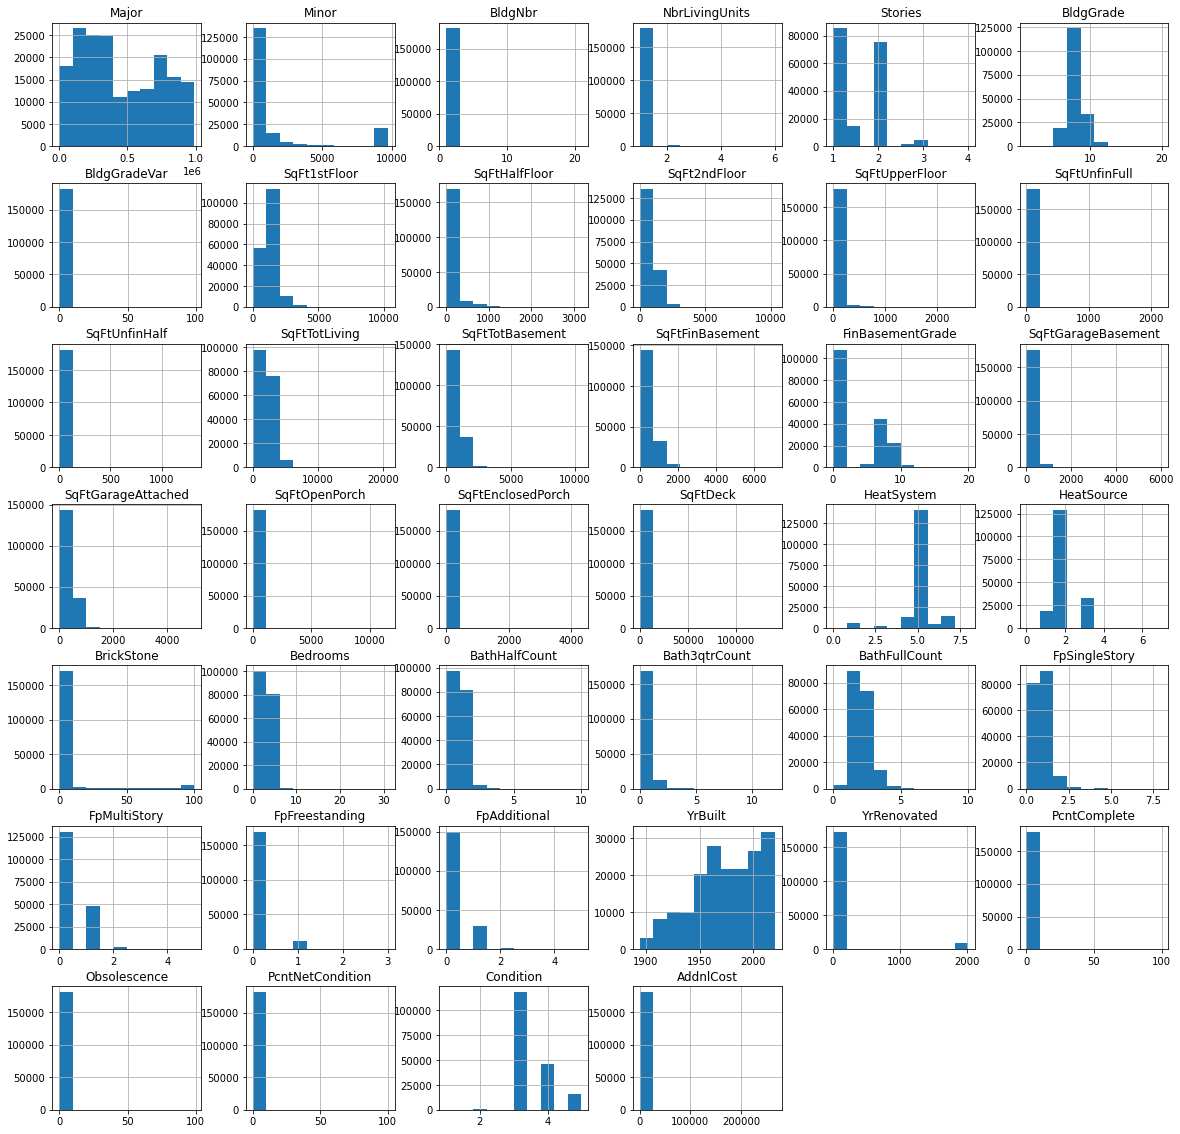

In [116]:
housing_data.hist(figsize=(20,20));

A lot of the variables don't follow a normal distribution which may create issues with satisfying all regression assumptions, Regression does not require features to be normally distributed so I'll address those issues as they arise. 

# Preprocessing

I'll take a look at missing values in each of the columns:

In [118]:
for column in housing_data.columns:
    num_of_null = (sum(housing_data[column].isnull())/len(housing_data[column])) * 100 #<- to figure out the proportion
    print(column, num_of_null)

Major 0.0
Minor 0.0
BldgNbr 0.0
NbrLivingUnits 0.0
Address 0.0
BuildingNumber 0.0
Fraction 0.0
DirectionPrefix 0.20053991515618974
StreetName 0.0
StreetType 0.0
DirectionSuffix 0.20053991515618974
ZipCode 14.828935044901106
Stories 0.0
BldgGrade 0.0
BldgGradeVar 0.0
SqFt1stFloor 0.0
SqFtHalfFloor 0.0
SqFt2ndFloor 0.0
SqFtUpperFloor 0.0
SqFtUnfinFull 0.0
SqFtUnfinHalf 0.0
SqFtTotLiving 0.0
SqFtTotBasement 0.0
SqFtFinBasement 0.0
FinBasementGrade 0.0
SqFtGarageBasement 0.0
SqFtGarageAttached 0.0
DaylightBasement 0.0
SqFtOpenPorch 0.0
SqFtEnclosedPorch 0.0
SqFtDeck 0.0
HeatSystem 0.0
HeatSource 0.0
BrickStone 0.0
ViewUtilization 0.0
Bedrooms 0.0
BathHalfCount 0.0
Bath3qtrCount 0.0
BathFullCount 0.0
FpSingleStory 0.0
FpMultiStory 0.0
FpFreestanding 0.0
FpAdditional 0.0
YrBuilt 0.0
YrRenovated 0.0
PcntComplete 0.0
Obsolescence 0.0
PcntNetCondition 0.0
Condition 0.0
AddnlCost 0.0


'DirectionPrefix', 'DirectionSuffix', and 'ZipCode' all contain null values. Upon further inspection of the dataframe, a number of columns contain empty values (indicated by '0') whilst others contain no values at all, all of which I will inspect further to see which should be dropped and which should be filled with a median:

In [119]:
housing_data['DirectionPrefix'].value_counts()

      109152
SE     21409
NE     21147
S      11034
SW      6830
NW      4253
N       3914
E       1866
W       1541
Name: DirectionPrefix, dtype: int64

In [120]:
housing_data['DirectionSuffix'].value_counts()

      77757
NE    28099
SE    26276
S     17434
SW    14474
N      5956
NW     5293
W      3218
E      2637
ST        2
Name: DirectionSuffix, dtype: int64

In [121]:
housing_data['ZipCode'].value_counts()

98042         4654
98115         4175
98023         4175
98038         3827
98058         3732
              ... 
98028-4505       1
98199-3014       1
98034-2540       1
98074-6568       1
98075-9645       1
Name: ZipCode, Length: 157, dtype: int64

In [125]:
housing_data['Fraction'].value_counts()

       175399
A        2393
B        2271
C         788
D         277
E         102
F          59
1/2        50
a          29
b          25
G          23
c          20
 A         13
H           7
SE          7
d           4
101         4
 B          3
I           3
0           3
J           2
1C          2
SW          2
NW          2
e           2
W           2
102         2
1D          1
2           1
103         1
f           1
1           1
N           1
18          1
sw          1
op          1
 D          1
S           1
NE          1
16          1
1A          1
2B          1
3           1
Name: Fraction, dtype: int64

In [126]:
housing_data['FpMultiStory'].value_counts()

0    130576
1     48131
2      2653
3       131
4        17
5         2
Name: FpMultiStory, dtype: int64

In [158]:
housing_data['FpFreestanding'].value_counts()

0    169571
1     11407
2       509
3        23
Name: FpFreestanding, dtype: int64

In [159]:
housing_data['FpAdditional'].value_counts()

0    150254
1     30065
2      1118
3        64
4         8
5         1
Name: FpAdditional, dtype: int64

In [160]:
housing_data['YrRenovated'].value_counts()

0       173037
2018       427
2016       400
2017       394
2015       298
         ...  
1930         2
1939         1
1936         1
1934         1
1924         1
Name: YrRenovated, Length: 91, dtype: int64

In [161]:
housing_data['PcntComplete'].value_counts()

0      179959
100       105
90         99
50         97
80         81
        ...  
27          1
23          1
49          1
13          1
5           1
Name: PcntComplete, Length: 86, dtype: int64

In [162]:
housing_data['Obsolescence'].value_counts()

0     180248
5        286
10       247
25        85
15        73
       ...  
80         1
21         1
29         1
67         1
68         1
Name: Obsolescence, Length: 68, dtype: int64

In [163]:
housing_data['PcntNetCondition'].value_counts()

0      181418
1          19
5          14
10         11
20          6
2           6
50          6
25          5
40          4
3           3
33          2
30          2
15          2
60          2
37          1
35          1
99          1
14          1
43          1
6           1
44          1
4           1
85          1
100         1
Name: PcntNetCondition, dtype: int64

In [164]:
housing_data['AddnlCost'].value_counts()

0        161520
6000       3138
5000       2648
3500       2486
9000       2072
          ...  
3770          1
4921          1
6840          1
6200          1
14200         1
Name: AddnlCost, Length: 356, dtype: int64

After careful consideration, I've decided to remove the above columns as many of them contain null or empty values and removing them will not adversely affect the data outcomes.

In [171]:
housing_data.head()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,9800,720,1,1,27719 SE 26TH WAY 98075,27719,,SE,26TH,WAY,...,0,0,0,2001,0,0,0,0,3,0
1,9802,140,1,1,2829 277TH TER SE 98075,2829,,,277TH,TER,...,0,0,0,2004,0,0,0,0,3,0
2,9830,20,1,1,1715 298TH CRESENT SE,1715,,,298TH CRESENT,,...,0,0,0,2017,0,0,0,0,3,0
3,9830,160,1,1,1861 297TH WAY SE 98024,1861,,,297TH,WAY,...,0,0,0,2013,0,0,0,0,3,0
4,10050,180,1,1,35410 25TH PL S 98003,35410,,,25TH,PL,...,0,0,0,1994,0,0,0,0,4,0


In [173]:
new_data = housing_data.drop(['DirectionPrefix', 'DirectionSuffix', 'ZipCode', 'Fraction', 'FpMultiStory'], axis= 1, inplace=True)

In [178]:
new_data2 = housing_data.drop(['FpFreestanding', 'FpAdditional', 'YrRenovated', 'PcntComplete', 'Obsolescence'], axis= 1, inplace=True)

In [179]:
new_data3 = housing_data.drop(['PcntNetCondition', 'AddnlCost'], axis= 1, inplace=True)

In [187]:
new_data4 = housing_data.drop(['ViewUtilization'], axis= 1, inplace=True)

In [189]:
new_data5 = housing_data.drop(['BrickStone', 'FpSingleStory'], axis= 1, inplace=True)

In [190]:
housing_data.head()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,StreetName,StreetType,Stories,BldgGrade,...,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Condition
0,9800,720,1,1,27719 SE 26TH WAY 98075,27719,26TH,WAY,2.0,11,...,0,0,5,2,4,1,0,3,2001,3
1,9802,140,1,1,2829 277TH TER SE 98075,2829,277TH,TER,2.0,10,...,0,0,5,2,4,1,2,2,2004,3
2,9830,20,1,1,1715 298TH CRESENT SE,1715,298TH CRESENT,,2.0,10,...,0,270,5,2,4,0,0,5,2017,3
3,9830,160,1,1,1861 297TH WAY SE 98024,1861,297TH,WAY,2.0,10,...,0,0,5,2,4,1,0,3,2013,3
4,10050,180,1,1,35410 25TH PL S 98003,35410,25TH,PL,2.0,7,...,0,0,5,2,3,1,1,1,1994,4


In [186]:
housing_data['ViewUtilization'].value_counts()

     89647
N    88008
Y     3846
y        8
0        1
Name: ViewUtilization, dtype: int64

In [183]:
housing_data['BrickStone'].value_counts()

0      170874
100      4130
15       1367
20        830
25        519
        ...  
82          1
13          1
69          1
76          1
42          1
Name: BrickStone, Length: 94, dtype: int64

In addition, I will remove the 'StreetName' and 'StreetType' columns since this information is already listed in the address column.

In [191]:
housing_data.drop(['StreetName', 'StreetType'], axis= 1, inplace=True)

In [193]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181510 entries, 0 to 181509
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Major               181510 non-null  int64  
 1   Minor               181510 non-null  int64  
 2   BldgNbr             181510 non-null  int64  
 3   NbrLivingUnits      181510 non-null  int64  
 4   Address             181510 non-null  object 
 5   BuildingNumber      181510 non-null  object 
 6   Stories             181510 non-null  float64
 7   BldgGrade           181510 non-null  int64  
 8   BldgGradeVar        181510 non-null  int64  
 9   SqFt1stFloor        181510 non-null  int64  
 10  SqFtHalfFloor       181510 non-null  int64  
 11  SqFt2ndFloor        181510 non-null  int64  
 12  SqFtUpperFloor      181510 non-null  int64  
 13  SqFtUnfinFull       181510 non-null  int64  
 14  SqFtUnfinHalf       181510 non-null  int64  
 15  SqFtTotLiving       181510 non-nul

In [194]:
new_df = pd.merge(housing_data, df,  how='left', left_on=['Major','Minor'], right_on = ['Major','Minor'])
new_df.head()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,...,SalePrice,RecordingNbr,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass,SaleWarning
0,9800,720,1,1,27719 SE 26TH WAY 98075,27719,2.0,11,0,1970,...,1300000,20180618000684,AYRES DOUGLAS W ...,HIGGIE JOHN ...,11,6,3,1,8,
1,9802,140,1,1,2829 277TH TER SE 98075,2829,2.0,10,0,1610,...,0,20200515000525,HOVIS WILLIAM ...,HOVIS WILLIAM+HOVIS REVOCABLE LIVING TRUST WIL...,11,6,15,18,8,
2,9802,140,1,1,2829 277TH TER SE 98075,2829,2.0,10,0,1610,...,0,20200515000524,HOVIS WILLIAM+LAURIE ...,HOVIS WILLIAM ...,11,6,15,18,8,
3,9802,140,1,1,2829 277TH TER SE 98075,2829,2.0,10,0,1610,...,0,20200515000523,HOVIS WILLIAM+LAURIE+ET AL ...,HOVIS WILLIAM+LAURIE ...,11,6,15,18,8,
4,9802,140,1,1,2829 277TH TER SE 98075,2829,2.0,10,0,1610,...,0,20151020001217,HOVIS WILLIAM P+LAURIE B ...,HOVIS WILLIAM P+LAURIE B-TTEES ...,3,6,4,5,8,31 51


In [195]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251300 entries, 0 to 251299
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Major               251300 non-null  int64  
 1   Minor               251300 non-null  int64  
 2   BldgNbr             251300 non-null  int64  
 3   NbrLivingUnits      251300 non-null  int64  
 4   Address             251300 non-null  object 
 5   BuildingNumber      251300 non-null  object 
 6   Stories             251300 non-null  float64
 7   BldgGrade           251300 non-null  int64  
 8   BldgGradeVar        251300 non-null  int64  
 9   SqFt1stFloor        251300 non-null  int64  
 10  SqFtHalfFloor       251300 non-null  int64  
 11  SqFt2ndFloor        251300 non-null  int64  
 12  SqFtUpperFloor      251300 non-null  int64  
 13  SqFtUnfinFull       251300 non-null  int64  
 14  SqFtUnfinHalf       251300 non-null  int64  
 15  SqFtTotLiving       251300 non-nul

In [198]:
new_df['NbrLivingUnits'].value_counts()

1    246655
2      3605
3      1003
4        21
6        16
Name: NbrLivingUnits, dtype: int64

For the sake of this analysis, which is to determine which home improvement projects provide the most value to a home, I will only keep the data pertaining to single living units only, and remove those that have 2 or more.

In [196]:
new_df.drop(['SellerName', 'BuyerName'], axis=1, inplace=True)

In [202]:
new_df.drop(['BldgNbr'], axis=1, inplace=True)

In [205]:
new_df.drop(['BldgGradeVar'], axis =1, inplace=True)

In [206]:
new_df.head()

,Major,Minor,NbrLivingUnits,Address,BuildingNumber,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,...,ExciseTaxNbr,DocumentDate,SalePrice,RecordingNbr,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass,SaleWarning
0,9800,720,1,27719 SE 26TH WAY 98075,27719,2.0,11,1970,0,2130,...,2936583,06/14/2018,1300000,20180618000684,11,6,3,1,8,
1,9802,140,1,2829 277TH TER SE 98075,2829,2.0,10,1610,0,1400,...,3046924,04/17/2020,0,20200515000525,11,6,15,18,8,
2,9802,140,1,2829 277TH TER SE 98075,2829,2.0,10,1610,0,1400,...,3046923,04/17/2020,0,20200515000524,11,6,15,18,8,
3,9802,140,1,2829 277TH TER SE 98075,2829,2.0,10,1610,0,1400,...,3046922,04/17/2020,0,20200515000523,11,6,15,18,8,
4,9802,140,1,2829 277TH TER SE 98075,2829,2.0,10,1610,0,1400,...,2762336,10/08/2015,0,20151020001217,3,6,4,5,8,31 51


# Outliers

Outliers should be kept if they have the potential to reveal useful information about relationships in our data. There is a variable in this dataset, however, whose outliers I will remove: multiple living units. If a residence in the dataset has more than 1  living unit, we're likely not dealing with single-family homes, but much larger units that would be better to analyze separately. For this reason, we'll remove all rows in the data that contain values greater than 1 for this column.

In [215]:
prices = single_family_homes[single_family_homes['SalePrice'] > 0]
prices.head()

,Major,Minor,NbrLivingUnits,Address,BuildingNumber,Stories,BldgGrade,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,...,ExciseTaxNbr,DocumentDate,SalePrice,RecordingNbr,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass,SaleWarning
0,9800,720,1,27719 SE 26TH WAY 98075,27719,2.0,11,1970,2130,0,...,2936583,06/14/2018,1300000,20180618000684,11,6,3,1,8,
5,9830,20,1,1715 298TH CRESENT SE,1715,2.0,10,2520,2560,0,...,2922038,03/22/2018,1849000,20180330001320,2,6,3,1,8,
6,9830,160,1,1861 297TH WAY SE 98024,1861,2.0,10,2210,1860,0,...,2733643,05/26/2015,1229000,20150529002205,2,6,3,1,8,
7,10050,180,1,35410 25TH PL S 98003,35410,2.0,7,910,700,0,...,2808722,07/07/2016,261200,20160713000331,3,6,18,4,8,13 31
8,10050,350,1,2423 S 354TH ST 98003,2423,2.0,7,920,760,0,...,2852646,02/22/2017,240000,20170310000363,11,6,3,1,8,15 46


In [216]:
len(prices)

171047

I will replace the approximate 75 thousand missing price values with the median to avoid losing important data

In [224]:
pricing_mean = (np.mean(new_df['SalePrice']))

In [228]:
new_df['SalePrice']=new_df['SalePrice'].replace(0,df['SalePrice'].mean())

In [227]:
new_df.SalePrice.apply('pricing_mean')

AttributeError: 'pricing_mean' is not a valid function for 'Series' object

In [229]:
new_df.head()

,Major,Minor,NbrLivingUnits,Address,BuildingNumber,Stories,BldgGrade,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,...,ExciseTaxNbr,DocumentDate,SalePrice,RecordingNbr,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass,SaleWarning
0,9800,720,1,27719 SE 26TH WAY 98075,27719,2.0,11,1970,2130,0,...,2936583,06/14/2018,1.300000e+06,20180618000684,11,6,3,1,8,
1,9802,140,1,2829 277TH TER SE 98075,2829,2.0,10,1610,1400,0,...,3046924,04/17/2020,1.070670e+06,20200515000525,11,6,15,18,8,
2,9802,140,1,2829 277TH TER SE 98075,2829,2.0,10,1610,1400,0,...,3046923,04/17/2020,1.070670e+06,20200515000524,11,6,15,18,8,
3,9802,140,1,2829 277TH TER SE 98075,2829,2.0,10,1610,1400,0,...,3046922,04/17/2020,1.070670e+06,20200515000523,11,6,15,18,8,
4,9802,140,1,2829 277TH TER SE 98075,2829,2.0,10,1610,1400,0,...,2762336,10/08/2015,1.070670e+06,20151020001217,3,6,4,5,8,31 51


In [234]:
new_df['SalePrice']= new_df['SalePrice'].astype(np.int64)

In [238]:
new_df.head()

,Major,Minor,NbrLivingUnits,Address,BuildingNumber,Stories,BldgGrade,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,...,ExciseTaxNbr,DocumentDate,SalePrice,RecordingNbr,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass,SaleWarning
0,9800,720,1,27719 SE 26TH WAY 98075,27719,2.0,11,1970,2130,0,...,2936583,06/14/2018,1300000,20180618000684,11,6,3,1,8,
1,9802,140,1,2829 277TH TER SE 98075,2829,2.0,10,1610,1400,0,...,3046924,04/17/2020,1070669,20200515000525,11,6,15,18,8,
2,9802,140,1,2829 277TH TER SE 98075,2829,2.0,10,1610,1400,0,...,3046923,04/17/2020,1070669,20200515000524,11,6,15,18,8,
3,9802,140,1,2829 277TH TER SE 98075,2829,2.0,10,1610,1400,0,...,3046922,04/17/2020,1070669,20200515000523,11,6,15,18,8,
4,9802,140,1,2829 277TH TER SE 98075,2829,2.0,10,1610,1400,0,...,2762336,10/08/2015,1070669,20151020001217,3,6,4,5,8,31 51


In [239]:
single_family_homes = new_df[new_df['NbrLivingUnits'] == 1]
single_family_homes

,Major,Minor,NbrLivingUnits,Address,BuildingNumber,Stories,BldgGrade,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,...,ExciseTaxNbr,DocumentDate,SalePrice,RecordingNbr,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass,SaleWarning
0,9800,720,1,27719 SE 26TH WAY 98075,27719,2.0,11,1970,2130,0,...,2936583,06/14/2018,1300000,20180618000684,11,6,3,1,8,
1,9802,140,1,2829 277TH TER SE 98075,2829,2.0,10,1610,1400,0,...,3046924,04/17/2020,1070669,20200515000525,11,6,15,18,8,
2,9802,140,1,2829 277TH TER SE 98075,2829,2.0,10,1610,1400,0,...,3046923,04/17/2020,1070669,20200515000524,11,6,15,18,8,
3,9802,140,1,2829 277TH TER SE 98075,2829,2.0,10,1610,1400,0,...,3046922,04/17/2020,1070669,20200515000523,11,6,15,18,8,
4,9802,140,1,2829 277TH TER SE 98075,2829,2.0,10,1610,1400,0,...,2762336,10/08/2015,1070669,20151020001217,3,6,4,5,8,31 51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251295,197220,5172,1,11 B W DRAVUS ST,11,3.0,8,220,510,380,...,3003445,08/05/2019,849950,20190806000703,11,6,3,1,8,
251296,197220,5172,1,11 B W DRAVUS ST,11,3.0,8,220,510,380,...,2991933,05/31/2019,1070669,20190605000679,11,6,15,1,8,
251297,197220,5172,1,11 B W DRAVUS ST,11,3.0,8,220,510,380,...,2794418,04/19/2016,1070669,20160505001028,3,6,15,11,8,18 31 38
251298,197220,5173,1,11 C W DRAVUS ST,11,3.0,8,200,490,380,...,3026041,12/13/2019,1070669,20191218000503,3,6,15,13,8,18 31 51


In [208]:
single_family_homes['SqFtHalfFloor'].value_counts()

0       224764
400        625
500        576
300        554
360        547
         ...  
716          1
208          1
592          1
2000         1
2390         1
Name: SqFtHalfFloor, Length: 393, dtype: int64

In [210]:
new_df.drop(['SqFtHalfFloor'], axis=1, inplace=True)

The main variable in the dataset that I would expect to be highly related with price is 'condition,which doesn't have a clear linear relationship. The values for this column are coded on a 1-5 linear scale, with 1 being 'poor' and 5 being 'very good.' Interestingly, the below scatterplot shows that 'average' houses tend to perform the best overall in terms of price.

In [236]:
single_family_homes['Condition'].value_counts()

3    158809
4     59913
5     25804
2      1733
1       396
Name: Condition, dtype: int64

In [214]:
single_family_homes['SalePrice'].value_counts()

0         75594
450000     1292
550000     1212
650000     1195
400000     1181
          ...  
348260        1
575575        1
323664        1
700440        1
278200        1
Name: SalePrice, Length: 21612, dtype: int64

C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'House Condition and Price')

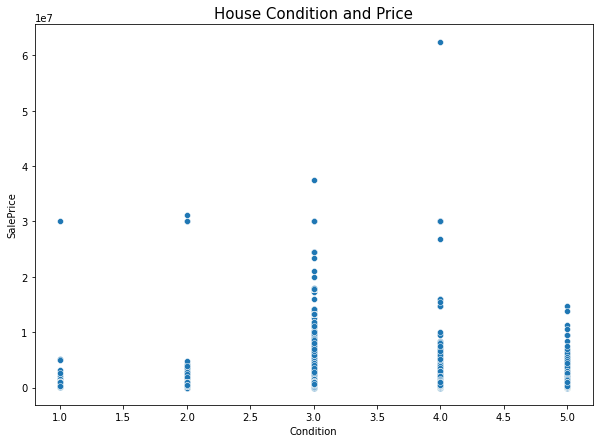

In [240]:
plt.figure(figsize=(10,7))
sns.scatterplot(single_family_homes['Condition'], single_family_homes['SalePrice'])
plt.title('House Condition and Price', fontsize=15)

This may be due to the fact that the condition values are relative to age and grade (i.e. the design/quality of construction rather than the utility/functionality of the building). A new, excellently designed, expensive home could be given an 'average' condition rating if some functional repairs are needed. As we can see in the scatterplot below, average condition houses also tend to do well with grade rating.

C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'House Condition and Grade')

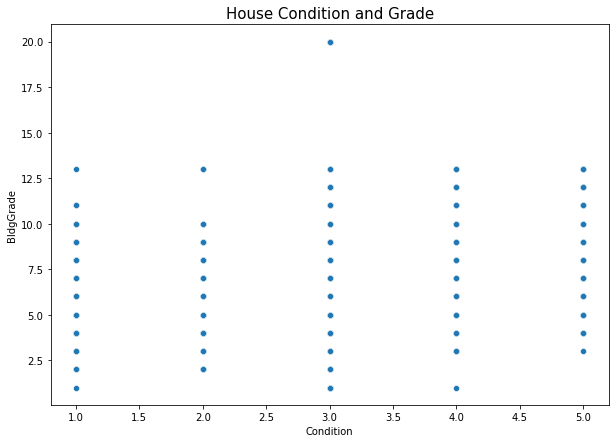

In [241]:
plt.figure(figsize=(10,7))
sns.scatterplot(single_family_homes['Condition'], single_family_homes['BldgGrade'])
plt.title('House Condition and Grade', fontsize=15)

A clearer linear relationship between price and specific condition values may be possible, which I will explore more effectively by one-hot encoding the variable. The below code creates a dummy variable for each condition value, drops the first value to avoid the dummy variable trap, drops the original column, and joins the new variables to the dataframe.

In [242]:
one_hot = pd.get_dummies(single_family_homes['Condition'], drop_first=True) #drop a column to avoid dummy variable trap
single_family_homes = single_family_homes.drop('Condition',axis = 1)
single_family_homes = single_family_homes.join(one_hot)

Now if I generate scatter plots the condition values, we should see a clearer linear relationship.

<Figure size 432x288 with 0 Axes>

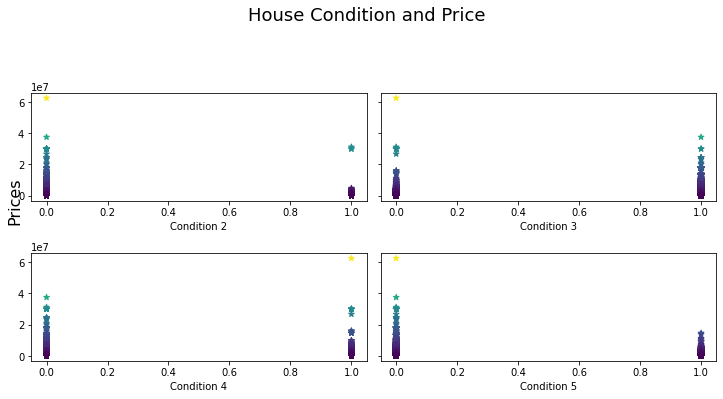

In [243]:
price = single_family_homes['SalePrice']
two = single_family_homes['two'] = single_family_homes[2] 
three = single_family_homes['three'] = single_family_homes[3] 
four = single_family_homes['four'] = single_family_homes[4] 
five = single_family_homes['five'] = single_family_homes[5] 

f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=False, sharey = True, figsize=(10,5))

f.suptitle('House Condition and Price', fontsize=18, y=1.1)
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16)

sc = axes[0][0].scatter(two, price, c = price, marker = "*")
axes[0][0].set_xlabel('Condition 2')

axes[0][1].scatter(three, price, c = price, marker = "*")
axes[0][1].set_xlabel('Condition 3')

axes[1][0].scatter(four, price, c = price, marker = "*")
axes[1][0].set_xlabel('Condition 4')

axes[1][1].scatter(five, price, c = price, marker = "*")
axes[1][1].set_xlabel('Condition 5')


f.tight_layout()
plt.show()